<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MySQL-Connector---AWS-Connection" data-toc-modified-id="MySQL-Connector---AWS-Connection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MySQL Connector - AWS Connection</a></span><ul class="toc-item"><li><span><a href="#Concatenate-downloaded-AWS-dataframes" data-toc-modified-id="Concatenate-downloaded-AWS-dataframes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Concatenate downloaded AWS dataframes</a></span></li><li><span><a href="#If-trouble-with-AWS-downloads-the-backup-option-is-to-load-csv-files" data-toc-modified-id="If-trouble-with-AWS-downloads-the-backup-option-is-to-load-csv-files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>If trouble with AWS downloads the backup option is to load csv files</a></span></li></ul></li><li><span><a href="#Exploration-of-all-years-2012-2018" data-toc-modified-id="Exploration-of-all-years-2012-2018-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration of all years 2012-2018</a></span><ul class="toc-item"><li><span><a href="#Graph:-Top-5-Causes-of-Accidental-Deaths-as-defined-by-10th-Rev-358-Selected-Causes-of-Death,-2012-2018" data-toc-modified-id="Graph:-Top-5-Causes-of-Accidental-Deaths-as-defined-by-10th-Rev-358-Selected-Causes-of-Death,-2012-2018-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Graph: Top 5 Causes of Accidental Deaths as defined by 10th Rev 358 Selected Causes of Death, 2012-2018</a></span></li><li><span><a href="#Graph:-Top-5-Causes-of-Accidental-Deaths-as-defined-by-10th-Rev-113-Selected-Causes-of-Death,-2012-2018m" data-toc-modified-id="Graph:-Top-5-Causes-of-Accidental-Deaths-as-defined-by-10th-Rev-113-Selected-Causes-of-Death,-2012-2018m-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Graph: Top 5 Causes of Accidental Deaths as defined by 10th Rev 113 Selected Causes of Death, 2012-2018m</a></span></li></ul></li><li><span><a href="#Top-cause-of-Accidental-Death-for-all-6-years-is-Accidental-Poisoning" data-toc-modified-id="Top-cause-of-Accidental-Death-for-all-6-years-is-Accidental-Poisoning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Top cause of Accidental Death for all 6 years is Accidental Poisoning</a></span><ul class="toc-item"><li><span><a href="#Poisoning-drill-down:-Graph-level-1-record-axis-condition-1" data-toc-modified-id="Poisoning-drill-down:-Graph-level-1-record-axis-condition-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Poisoning drill down: Graph level 1 record axis condition 1</a></span></li></ul></li><li><span><a href="#Accidents-2018/2017-Top-10-Bar-Charts" data-toc-modified-id="Accidents-2018/2017-Top-10-Bar-Charts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Accidents 2018/2017 Top 10 Bar Charts</a></span></li><li><span><a href="#Accidents-2018/2017-Top-10-Grouped-by-Sex-Bar-Charts" data-toc-modified-id="Accidents-2018/2017-Top-10-Grouped-by-Sex-Bar-Charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accidents 2018/2017 Top 10 Grouped by Sex Bar Charts</a></span></li><li><span><a href="#Accidents-2018/2017-All-Accidental-Deaths-Grouped-by-Age" data-toc-modified-id="Accidents-2018/2017-All-Accidental-Deaths-Grouped-by-Age-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Accidents 2018/2017 All Accidental Deaths Grouped by Age</a></span></li><li><span><a href="#Save-to-csv" data-toc-modified-id="Save-to-csv-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save to csv</a></span></li></ul></div>

# EDA Start for Accidental Deaths

In [3]:
# Essentials
import sys
import pandas as pd
pd.set_option('display.max_columns', 100)
import csv
import numpy as np
import os

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stats
from scipy import stats
from scipy.stats import skew


### MySQL Connector - AWS Connection

In [25]:
%%time

import mysql.connector

conn = mysql.connector.connect(option_files='aws_mort_conn.conf')

print("Connection ID: ",conn.connection_id)


Connection ID:  2616
Wall time: 150 ms


In [30]:
%%time

# m2018aws = pd.read_sql_query("SELECT * FROM mortality_2017 WHERE RAND() <0.25", conn)

sql = """
SELECT 
        person_id,year_id,
        edu,
        month_of_death,
        sex,
        age_recode_52,age_recode_27,age_recode_12,
        place_of_death_and_status,
        marital_status,
        day_of_week_of_death,
        data_year,
        injury_at_work,manner_of_death,
        method_of_disposition,autopsy,
        activity_code,place_of_injury,
        cause_recode_358,cause_recode_113,
        number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,
        recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,
        bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode

FROM    mortality_2012

WHERE
        mortality_2012.cause_recode_358 >= 382 AND mortality_2012.cause_recode_358 <= 423

"""


m2012aws = pd.read_sql_query(sql, conn)



Wall time: 36.8 s


In [32]:
%%time
conn.close()
conn.is_connected()

Wall time: 0 ns


False

In [20]:
m2018aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
164661,2783223,8,31,10,M,33,13,6,7,S,5,2018,Y,1,B,Y,9,99,384,115,2,V812,V812,T07,None,None,None,1,1,6
145034,2464232,8,21,7,M,33,13,6,7,D,2,2018,N,1,B,Y,9,99,384,115,2,V059,V059,T07,None,None,None,2,2,7
145666,2475074,8,21,8,M,32,12,5,7,S,7,2018,N,1,B,Y,9,99,384,115,2,V059,V059,T07,None,None,None,2,2,7
152635,2598390,8,11,5,F,28,8,3,7,S,4,2018,N,1,C,N,9,99,384,115,3,V059,V059,S099,T099,None,None,1,1,6
12459,230374,8,91,3,F,37,17,8,7,M,4,2018,N,1,C,Y,9,99,384,115,2,V059,V059,T07,None,None,None,1,1,6


In [16]:
m2017aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,7,7,61,1,M,35,15,7,4,M,2,2017,U,7,C,N,9,9,423,123,7,X599,X599,I64,J189,J969,J988,1,1,6
1,29,7,41,1,F,30,10,4,2,S,1,2017,N,1,C,Y,9,99,397,114,2,V092,V092,S099,None,None,None,1,1,6
2,31,7,41,1,F,33,13,6,7,M,6,2017,N,1,C,Y,9,99,393,114,2,V499,V499,T099,None,None,None,3,3,8
3,64,7,31,1,F,31,11,5,7,S,6,2017,N,1,C,Y,9,99,393,114,4,V494,V494,T07,T099,T149,None,3,3,8
4,108,7,31,1,M,39,19,9,2,D,7,2017,N,1,C,Y,9,99,397,114,2,V877,V877,T07,None,None,None,1,1,6


In [18]:
m2016aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,12,6,31,1,M,41,21,10,1,D,1,2016,N,1,C,N,9,9,404,118,4,W18,W18,I10,S068,S729,None,1,1,1
1,19,6,41,1,M,37,17,8,7,M,6,2016,N,1,R,Y,9,99,397,114,2,V877,V877,T07,None,None,None,1,1,6
2,21,6,31,1,M,33,13,6,7,M,7,2016,N,1,C,Y,9,9,417,123,2,X36,X36,T71,None,None,None,1,1,6
3,23,6,61,1,M,42,22,10,1,M,3,2016,N,1,C,N,9,9,404,118,5,W00,W00,S009,S066,S069,S099,1,1,6
4,38,6,31,1,M,39,19,9,7,W,7,2016,N,1,C,N,9,9,423,123,5,W22,W22,S021,S099,S299,T71,1,1,6


In [22]:
m2015aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,10,5,9,1,F,44,24,11,6,W,7,2015,U,7,C,N,9,9,406,118,6,W19,W19,E039,F03,I694,R688,1,1,6
1,16,5,3,1,M,32,12,5,1,S,6,2015,N,1,B,N,9,9,423,123,2,X599,X599,S099,None,None,None,3,3,8
2,51,5,3,1,M,35,15,7,4,S,2,2015,U,7,B,N,9,9,421,122,4,X45,X45,F101,R749,T519,None,3,3,8
3,56,5,4,1,F,31,11,5,4,S,1,2015,N,1,C,Y,9,0,420,122,7,X44,X44,F199,T401,T402,T406,1,1,6
4,95,5,6,1,M,39,19,9,7,M,5,2015,N,1,B,Y,9,8,423,123,5,X31,X31,I119,I250,T68,T699,3,3,8


In [27]:
m2014aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,31,4,3,1,F,38,18,8,2,M,6,2014,N,1,C,N,9,99,397,114,2,V877,V877,T07,None,None,None,1,1,6
1,56,4,3,1,F,44,24,11,1,W,2,2014,U,7,B,N,9,9,423,123,6,X590,X590,D693,J189,J969,S324,1,1,6
2,76,4,3,1,M,36,16,7,1,S,1,2014,N,1,C,N,9,99,397,114,4,V877,V877,S097,S197,T099,None,1,1,6
3,77,4,3,1,F,31,11,5,2,M,7,2014,N,1,B,N,9,99,397,114,2,V877,V877,T07,None,None,None,38,4,8
4,80,4,3,1,M,37,17,8,7,M,5,2014,N,1,C,Y,9,9,420,122,8,X41,X41,F199,I119,I250,T436,1,1,1


In [29]:
m2013aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,43,3,14,1,M,38,18,8,1,S,3,2013,N,1,U,Y,9,99,397,114,3,V092,V092,S099,S199,None,None,1,1,6
1,53,3,12,1,M,34,14,6,1,S,7,2013,N,1,U,N,9,99,386,114,2,V031,V031,T099,None,None,None,1,1,6
2,60,3,14,1,F,38,18,8,1,M,2,2013,U,7,U,N,9,9,420,122,3,X42,X42,G931,T402,None,None,1,1,6
3,95,3,12,1,M,42,22,10,4,M,7,2013,U,7,U,N,9,9,410,123,5,W80,W80,I64,N40,R13,T179,1,1,6
4,105,3,12,1,M,32,12,5,2,S,4,2013,N,1,U,Y,9,9,420,122,4,X44,X44,F199,T402,T424,None,1,1,6


In [31]:
m2012aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,34,2,12,1,M,37,17,8,1,D,1,2012,N,1,U,N,9,8,420,122,10,X42,X42,T405,T406,T510,T519,1,1,6
1,45,2,12,1,M,33,13,6,1,S,1,2012,U,7,U,N,9,9,410,123,5,W78,W78,G931,I458,J80,T179,1,1,6
2,51,2,14,1,M,36,16,7,4,S,1,2012,N,1,U,Y,9,0,420,122,6,X44,X44,F199,T402,T424,T510,1,1,6
3,55,2,12,1,M,43,23,11,2,M,4,2012,N,1,U,N,9,0,406,118,3,W19,W19,S065,S099,None,None,1,1,6
4,68,2,12,1,F,41,21,10,1,D,2,2012,N,1,U,N,9,99,397,114,2,V892,V892,T149,None,None,None,3,3,8


In [36]:
m2018aws.sort_values(by=['person_id'], inplace=True)
# m2018aws.sort_index()
m2018aws.head()

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
0,2,8,31,1,M,31,11,5,7,S,4,2018,N,1,B,N,9,99,392,114,5,V475,V475,S021,S099,T099,T149,3,3,8
1,6,8,61,1,F,32,12,5,7,M,2,2018,N,1,C,Y,9,99,397,114,4,V892,V892,S099,S199,T099,None,1,1,6
2,28,8,31,1,M,33,13,6,7,S,5,2018,N,1,C,Y,9,99,393,114,5,V436,V436,S099,S368,T099,T149,3,3,8
3,32,8,31,1,F,41,21,10,4,D,7,2018,U,7,B,N,99,99,423,123,5,Y86,Y86,F209,J81,N185,T96,3,3,8
4,82,8,61,1,M,37,17,8,4,D,3,2018,N,1,C,N,9,0,420,122,8,X44,X44,E149,E669,I10,T402,1,1,6


In [38]:
m2018aws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167127 entries, 0 to 167126
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        167127 non-null  int64 
 1   year_id                          167127 non-null  object
 2   edu                              167127 non-null  object
 3   month_of_death                   167127 non-null  object
 4   sex                              167127 non-null  object
 5   age_recode_52                    167127 non-null  object
 6   age_recode_27                    167127 non-null  object
 7   age_recode_12                    167127 non-null  object
 8   place_of_death_and_status        167127 non-null  object
 9   marital_status                   167127 non-null  object
 10  day_of_week_of_death             167127 non-null  object
 11  data_year                        167127 non-null  object
 12  injury_at_work  

In [39]:
m2017aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169936 entries, 0 to 169935
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        169936 non-null  int64 
 1   year_id                          169936 non-null  object
 2   edu                              169936 non-null  object
 3   month_of_death                   169936 non-null  object
 4   sex                              169936 non-null  object
 5   age_recode_52                    169936 non-null  object
 6   age_recode_27                    169936 non-null  object
 7   age_recode_12                    169936 non-null  object
 8   place_of_death_and_status        169936 non-null  object
 9   marital_status                   169936 non-null  object
 10  day_of_week_of_death             169936 non-null  object
 11  data_year                        169936 non-null  object
 12  injury_at_work  

In [40]:
m2016aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161374 entries, 0 to 161373
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        161374 non-null  int64 
 1   year_id                          161374 non-null  object
 2   edu                              161374 non-null  object
 3   month_of_death                   161374 non-null  object
 4   sex                              161374 non-null  object
 5   age_recode_52                    161374 non-null  object
 6   age_recode_27                    161374 non-null  object
 7   age_recode_12                    161374 non-null  object
 8   place_of_death_and_status        161374 non-null  object
 9   marital_status                   161374 non-null  object
 10  day_of_week_of_death             161374 non-null  object
 11  data_year                        161374 non-null  object
 12  injury_at_work  

In [41]:
m2015aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146571 entries, 0 to 146570
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        146571 non-null  int64 
 1   year_id                          146571 non-null  object
 2   edu                              146571 non-null  object
 3   month_of_death                   146571 non-null  object
 4   sex                              146571 non-null  object
 5   age_recode_52                    146571 non-null  object
 6   age_recode_27                    146571 non-null  object
 7   age_recode_12                    146571 non-null  object
 8   place_of_death_and_status        146571 non-null  object
 9   marital_status                   146571 non-null  object
 10  day_of_week_of_death             146571 non-null  object
 11  data_year                        146571 non-null  object
 12  injury_at_work  

In [42]:
m2014aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136053 entries, 0 to 136052
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        136053 non-null  int64 
 1   year_id                          136053 non-null  object
 2   edu                              136053 non-null  object
 3   month_of_death                   136053 non-null  object
 4   sex                              136053 non-null  object
 5   age_recode_52                    136053 non-null  object
 6   age_recode_27                    136053 non-null  object
 7   age_recode_12                    136053 non-null  object
 8   place_of_death_and_status        136053 non-null  object
 9   marital_status                   136053 non-null  object
 10  day_of_week_of_death             136053 non-null  object
 11  data_year                        136053 non-null  object
 12  injury_at_work  

In [43]:
m2013aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130557 entries, 0 to 130556
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        130557 non-null  int64 
 1   year_id                          130557 non-null  object
 2   edu                              130557 non-null  object
 3   month_of_death                   130557 non-null  object
 4   sex                              130557 non-null  object
 5   age_recode_52                    130557 non-null  object
 6   age_recode_27                    130557 non-null  object
 7   age_recode_12                    130557 non-null  object
 8   place_of_death_and_status        130557 non-null  object
 9   marital_status                   130557 non-null  object
 10  day_of_week_of_death             130557 non-null  object
 11  data_year                        130557 non-null  object
 12  injury_at_work  

In [44]:
m2012aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127792 entries, 0 to 127791
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   person_id                        127792 non-null  int64 
 1   year_id                          127792 non-null  object
 2   edu                              127792 non-null  object
 3   month_of_death                   127792 non-null  object
 4   sex                              127792 non-null  object
 5   age_recode_52                    127792 non-null  object
 6   age_recode_27                    127792 non-null  object
 7   age_recode_12                    127792 non-null  object
 8   place_of_death_and_status        127792 non-null  object
 9   marital_status                   127792 non-null  object
 10  day_of_week_of_death             127792 non-null  object
 11  data_year                        127792 non-null  object
 12  injury_at_work  

#### Concatenate downloaded AWS dataframes

In [45]:
# List of downloaded frames to concatenate
aws_frames = [m2018aws, m2017aws, m2016aws, m2015aws, m2014aws, m2013aws, m2012aws]

acc_all = pd.concat(aws_frames, axis=0, ignore_index=True)

In [52]:
acc_all.sample(25)

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
536178,699232,5,21,2,F,31,11,5,4,S,7,2015,N,1,C,Y,9,0,420,122,5,X44,X44,T402,T424,T432,T509,1,1,6
410362,1272545,6,71,4,M,43,23,11,2,W,5,2016,N,1,B,N,9,9,410,123,3,W79,W79,F03,T179,None,None,1,1,6
27686,483863,8,61,11,M,35,15,7,1,D,5,2018,N,1,C,N,9,0,406,118,5,W19,W19,F102,S065,S069,S099,1,1,6
407915,1223460,6,31,7,M,36,16,7,7,S,1,2016,N,1,C,N,4,9,410,123,2,W79,W79,T179,None,None,None,1,1,6
54891,951559,8,31,12,F,42,22,10,5,W,1,2018,N,1,B,N,9,0,423,123,7,X31,X31,E43,I119,I250,J449,2,2,7
410391,1273143,6,61,4,M,39,19,9,1,M,7,2016,N,1,C,N,9,9,406,118,5,W19,W19,I119,I250,S069,S099,1,1,6
925759,289587,2,31,8,F,34,14,6,2,M,4,2012,N,1,C,Y,9,4,412,123,2,W87,W87,T754,None,None,None,1,1,4
563282,1223738,5,11,3,F,30,10,4,4,S,7,2015,N,1,B,Y,9,9,420,122,5,X42,X42,F199,T401,T404,T405,1,1,6
370178,577876,6,91,5,M,35,15,7,2,U,1,2016,N,1,O,Y,9,99,397,114,2,V092,V092,T07,None,None,None,1,1,3
488996,2587403,6,21,7,M,33,13,6,4,U,2,2016,N,1,C,Y,9,0,420,122,9,X44,X44,F179,I119,I250,K746,1,1,6


In [1]:
acc_all.info()

NameError: name 'acc_all' is not defined

#### If trouble with AWS downloads the backup option is to load csv files

In [4]:
%%time 
# # Load all files
# m2018 = pd.read_csv('data/rawdata/mort_2018.csv', low_memory=False)
# print('m2018 file loaded')
# m2017 = pd.read_csv('data/rawdata/mort_2017.csv', low_memory=False)
# print('m2017 file loaded')
# m2016 = pd.read_csv('data/rawdata/mort_2016.csv', low_memory=False)
# print('m2016 file loaded')
# m2015 = pd.read_csv('data/rawdata/mort_2015.csv', low_memory=False)
# print('m2015 file loaded')
# m2014 = pd.read_csv('data/rawdata/mort_2014.csv', low_memory=False)
# print('m2014 file loaded')
# m2013 = pd.read_csv('data/rawdata/mort_2013.csv', low_memory=False)
# print('m2013 file loaded')
# m2012 = pd.read_csv('data/rawdata/mort_2012.csv', low_memory=False)
# print('m2012 file loaded')

acc_all = pd.read_csv('data/mort_accidents_all.csv')

Wall time: 3.41 s


### Exploration of all years 2012-2018

In [5]:
# Groupby Data Year and type of accident
# find top 10 count
def top_val_count(x, n):
    return x.value_counts().head(n)

# groupby and find top 10 frequencies
gb = acc_all.groupby(['data_year']).cause_recode_358
acc_all_top_freq = gb.apply(top_val_count,5)
acc_all_top_freq

data_year     
2012       420    33175
           397    17927
           406    13649
           404    11369
           423    10197
2013       420    35663
           397    18734
           406    14421
           404    12027
           423     9692
2014       420    38718
           397    19365
           406    14448
           404    13533
           423    10220
2015       420    44126
           397    21024
           406    15142
           404    14157
           423    11057
2016       420    54793
           397    21820
           406    16127
           404    14426
           423    11076
2017       420    61311
           397    21354
           406    16680
           404    15308
           423    11160
2018       420    58908
           397    21306
           406    17223
           404    16067
           423    10706
Name: cause_recode_358, dtype: int64

#### Graph: Top 5 Causes of Accidental Deaths as defined by 10th Rev 358 Selected Causes of Death, 2012-2018

Text(0, 0.5, 'Number of Deaths')

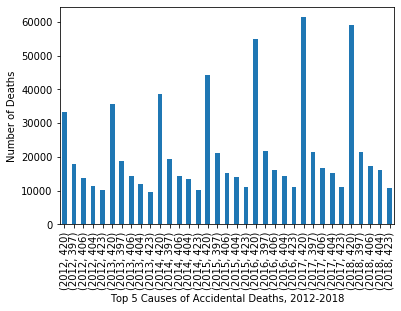

In [45]:
# acc['cause_recode_358'].value_counts().head(10).plot(kind='barh', x='cause_recode_358')
acc_all_top_freq.plot(kind='bar', x='cause_recode_358')
plt.xlabel("Top 5 Causes of Accidental Deaths, 2012-2018")
plt.ylabel("Number of Deaths")
# plt.invert_yaxis()
# plt.yticks(np.arange(10), ('420 Accidental poisoning', '397 Other motor vehicle accidents', '406 Unspecified fall', '404 Fall on same level', '423 All other accidents', '393 Occupant involved in collision with other motor vehicle', '410 Accidental inhalation and ingestion of food', '388 Motorcyclist accident', '405 Fall from one level to another', '409 Accidental drowning and submersion'))

In [51]:
# comparison to recode 113 scheme -- Same main causes
gb113 = acc_all.groupby(['data_year']).cause_recode_113
acc113_top = gb113.apply(top_val_count,5)
acc113_top

data_year     
2012       114    36415
           122    36332
           118    28753
           123    17099
           120     3551
2013       122    38851
           114    35369
           118    30208
           123    16904
           120     3391
2014       122    42032
           114    35398
           118    31959
           123    17430
           120     3406
2015       122    47478
           114    37757
           118    33381
           123    18523
           120     3602
2016       122    58335
           114    40327
           118    34673
           123    18307
           120     3786
2017       122    64795
           114    40231
           118    36338
           123    18772
           120     3709
2018       122    62399
           114    39404
           118    37455
           123    18101
           120     3710
Name: cause_recode_113, dtype: int64

#### Graph: Top 5 Causes of Accidental Deaths as defined by 10th Rev 113 Selected Causes of Death, 2012-2018m

Text(0, 0.5, 'Number of Deaths')

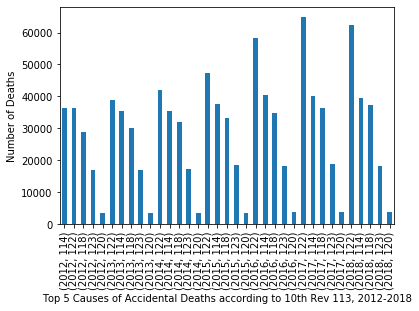

In [53]:
acc113_top.plot(kind='bar', x='cause_recode_113')
plt.xlabel("Top 5 Causes of Accidental Deaths according to 10th Rev 113, 2012-2018")
plt.ylabel("Number of Deaths")

### Top cause of Accidental Death for all 6 years is Accidental Poisoning
*420 Accidental poisoning by and exposure to drugs and other biological substances (X40-X44)*

In [3]:
acc_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039410 entries, 0 to 1039409
Data columns (total 30 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   person_id                        1039410 non-null  int64 
 1   year_id                          1039410 non-null  int64 
 2   edu                              1039410 non-null  int64 
 3   month_of_death                   1039410 non-null  int64 
 4   sex                              1039410 non-null  object
 5   age_recode_52                    1039410 non-null  int64 
 6   age_recode_27                    1039410 non-null  int64 
 7   age_recode_12                    1039410 non-null  int64 
 8   place_of_death_and_status        1039410 non-null  int64 
 9   marital_status                   1039410 non-null  object
 10  day_of_week_of_death             1039410 non-null  int64 
 11  data_year                        1039410 non-null  int64 
 12  

In [7]:
mask = acc_all['cause_recode_358'] == 420

poison = acc_all[mask]

In [8]:
poison.sample(20)

,person_id,year_id,edu,month_of_death,sex,age_recode_52,age_recode_27,age_recode_12,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,cause_recode_358,cause_recode_113,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,bridged_race_1,bridged_race_recode_5,hispanicorigin_bridgeracerecode
612297,2121727,5,51,12,M,31,11,5,4,M,2,2015,N,1,C,Y,9,0,420,122,7,X44,X44,F191,T401,T402,T424,1,1,6
807317,516651,3,41,4,M,38,18,8,4,M,7,2013,N,1,C,Y,9,9,420,122,4,X42,X42,F119,I119,T402,NaN,1,1,6
604654,1987256,5,31,1,F,38,18,8,7,D,3,2015,N,1,C,Y,9,0,420,122,3,X44,X44,I469,T509,NaN,NaN,1,1,6
914916,66113,2,11,6,M,43,23,11,1,W,1,2012,U,7,B,N,9,9,420,122,4,X44,X44,J969,R578,T455,NaN,1,1,6
984534,1479143,2,41,1,M,31,11,5,2,S,3,2012,N,1,B,Y,9,0,420,122,3,X44,X44,J690,T509,NaN,NaN,1,1,6
625494,2360271,5,31,7,M,32,12,5,4,S,5,2015,N,1,B,N,9,0,420,122,5,X42,X42,E149,F199,I119,T401,1,1,1
48492,835109,8,31,11,M,32,12,5,2,S,7,2018,N,1,C,Y,9,0,420,122,3,X41,X41,T436,T509,NaN,NaN,1,1,6
559891,1145623,5,31,12,M,36,16,7,4,S,6,2015,N,1,C,Y,9,9,420,122,3,X42,X42,F191,T404,NaN,NaN,1,1,6
35976,615152,8,11,7,F,32,12,5,7,S,5,2018,N,1,C,Y,9,9,420,122,4,X42,X42,F191,T404,T405,NaN,2,2,7
987005,1537733,2,41,12,F,38,18,8,4,W,1,2012,N,1,B,N,9,0,420,122,3,X44,X44,F191,T509,NaN,NaN,1,1,6


In [9]:
poison['number_of_recordaxis_conditions'].mean()

4.419885274905569

In [10]:
pd.options.display.max_rows = 2000

poisonRecAX1 = poison.groupby(['data_year'])['recAx_condition_1st'].value_counts()
poisonRecAX1

data_year  recAx_condition_1st
2012       X44                    16725
           X42                    13932
           X41                     2292
           X40                      210
           X43                       16
2013       X44                    17256
           X42                    15241
           X41                     2909
           X40                      233
           X43                       24
2014       X44                    18582
           X42                    16822
           X41                     3069
           X40                      224
           X43                       21
2015       X44                    20108
           X42                    19914
           X41                     3870
           X40                      202
           X43                       32
2016       X42                    26061
           X44                    23876
           X41                     4581
           X40                      253
         

#### Poisoning drill down: Graph level 1 record axis condition 1 

Text(0, 0.5, 'number of deaths')

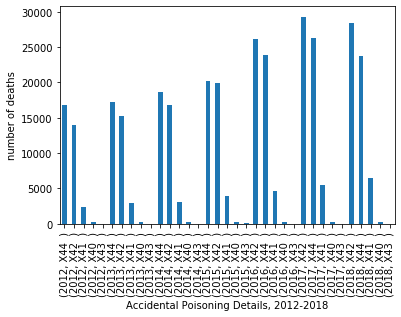

In [11]:
poisonRecAX1.plot(kind='bar', x='recAx_condition_1st')
plt.xlabel("Accidental Poisoning Details, 2012-2018")
plt.ylabel("number of deaths")
# plt.yticks(np.arange(10), ('420 Accidental poisoning', '397 Other motor vehicle accidents', '406 Unspecified fall', '404 Fall on same level', '423 All other accidents', '393 Occupant involved in collision with other motor vehicle', '410 Accidental inhalation and ingestion of food', '388 Motorcyclist accident', '405 Fall from one level to another', '409 Accidental drowning and submersion'))

In [12]:
pd.options.display.max_rows = 8150

# groupby and find top 10 frequencies
# gb = acc_all.groupby(['data_year']).cause_recode_358
# acc_all_top_freq = gb.apply(top_val_count,5)
# acc_all_top_freq

gbRecAx2 = poison.groupby(['data_year','recAx_condition_1st'])['recAx_condition_2nd']
poisonRecAx2 = gbRecAx2.apply(top_val_count,10)
poisonRecAx2

data_year  recAx_condition_1st       
2012       X40                  K729       30
                                T391       18
                                K720       13
                                T411       11
                                A419       10
                                T390        8
                                K704        7
                                F191        5
                                F102        5
                                F179        5
           X41                  T436      528
                                T424      135
                                I119      116
                                F191      115
                                F109      101
                                T432       86
                                E149       77
                                F159       72
                                T430       71
                                F199       69
           X42                  T401     2

In [13]:
pd.options.display.max_rows = 8150

# groupby and find top 10 frequencies of record axis 2 
gbRecAx2a = poison.groupby(['data_year'])['recAx_condition_2nd']
poisonRecAx2a = gbRecAx2a.apply(top_val_count,10)
poisonRecAx2a

data_year       
2012       T509      3937
           T402      3773
           F191      3257
           T401      2760
           F199      1758
           F109      1293
           T403      1216
           F119       845
           I119       812
           F179       754
2013       F191      4768
           T509      3495
           T402      3361
           T401      3105
           F199      2646
           F109      1612
           F119      1576
           T403       936
           F179       762
           I119       739
2014       F191      5611
           T401      3468
           T402      3400
           T509      3220
           F199      2976
           F119      2222
           F109      1865
           T404       982
           F179       897
           T403       842
2015       F191      7264
           T401      4436
           F199      3783
           T402      3552
           T509      3192
           F119      2526
           F109      1994
           T404      

### Accidents 2018/2017 Top 10 Bar Charts

([<matplotlib.axis.YTick at 0x2027e574d88>,
 <a list of 10 Text yticklabel objects>)

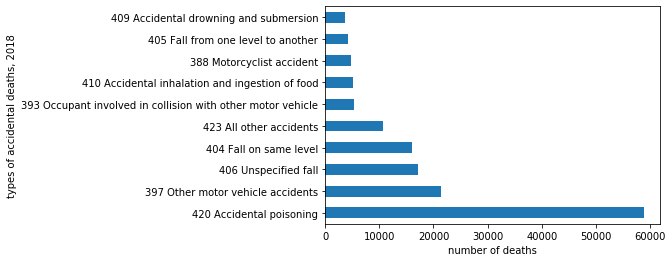

In [304]:
acc['cause_recode_358'].value_counts().head(10).plot(kind='barh', x='cause_recode_358')
plt.ylabel("types of accidental deaths, 2018")
plt.xlabel("number of deaths")
# plt.invert_yaxis()
plt.yticks(np.arange(10), ('420 Accidental poisoning', '397 Other motor vehicle accidents', '406 Unspecified fall', '404 Fall on same level', '423 All other accidents', '393 Occupant involved in collision with other motor vehicle', '410 Accidental inhalation and ingestion of food', '388 Motorcyclist accident', '405 Fall from one level to another', '409 Accidental drowning and submersion'))

Text(0.5, 0, 'number of deaths')

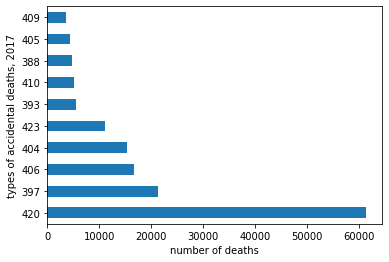

In [306]:
acc17['cause_recode_358'].value_counts().head(10).plot(kind='barh', x='cause_recode_358')
plt.ylabel("types of accidental deaths, 2017")
plt.xlabel("number of deaths")

In [212]:
# find top 10 count
def top_val_count(x, n=10):
    return x.value_counts().head(n)

# groupby and find top 10 frequencies
gb = acc.groupby(['sex']).cause_recode_358
acc_top_freq = gb.apply(top_val_count)
# acc_top_freq.rename(columns=dict(level_1='cause_recode_358', cause_recode_358='CoD_count'))
acc_top_freq#.sort_values('level_1', ascending=False)

sex     
F    420    18330
     406     8971
     404     8470
     397     7011
     423     4289
     410     2270
     393     1954
     414     1204
     405     1174
     409      907
M    420    40578
     397    14295
     406     8252
     404     7597
     423     6417
     388     4254
     393     3334
     405     2991
     410     2814
     409     2803
Name: cause_recode_358, dtype: int64

### Accidents 2018/2017 Top 10 Grouped by Sex Bar Charts

Text(0.5, 0, 'number of deaths')

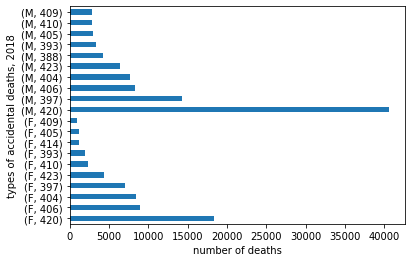

In [310]:
acc_top_freq.plot(kind='barh', x='level_1')
# acc_top_freq.sort_values('level_1').plot(kind='bar', x='level_1')
plt.ylabel("types of accidental deaths, 2018")
plt.xlabel("number of deaths")

In [309]:
# find top 10 count
def top_val_count(x, n=10):
    return x.value_counts().head(n)

# groupby and find top 10 frequencies
gb = acc17.groupby(['sex']).cause_recode_358
acc17_top_freq = gb.apply(top_val_count)
# acc_top_freq.rename(columns=dict(level_1='cause_recode_358', cause_recode_358='CoD_count'))
acc17_top_freq#.sort_values('level_1', ascending=False)

sex     
F    420    19331
     406     8658
     404     8129
     397     7008
     423     4592
     410     2356
     393     2021
     405     1159
     414     1146
     386      924
M    420    41980
     397    14346
     406     8022
     404     7179
     423     6568
     388     4416
     393     3450
     405     3191
     410     2860
     409     2802
Name: cause_recode_358, dtype: int64

Text(0.5, 0, 'number of deaths')

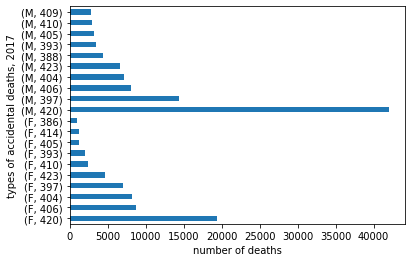

In [311]:
acc17_top_freq.plot(kind='barh', x='level_1')
# acc_top_freq.sort_values('level_1').plot(kind='bar', x='level_1')
plt.ylabel("types of accidental deaths, 2017")
plt.xlabel("number of deaths")

### Accidents 2018/2017 All Accidental Deaths Grouped by Age

Text(0, 0.5, 'age range, 10 year increments')

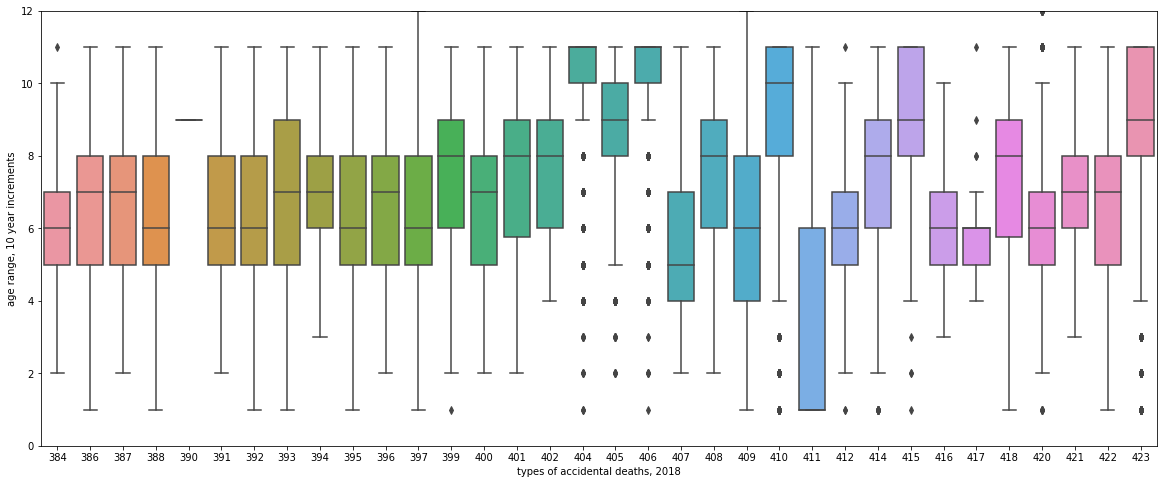

In [322]:
# Relationship btn Age and Accidental Cause of Death 2018
data = pd.concat([acc['age_recode_12'], acc['cause_recode_358']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=acc['cause_recode_358'], y=acc['age_recode_12'], data=data)
fig.axis(ymin=0, ymax=12);
plt.xlabel("types of accidental deaths, 2018")
plt.ylabel("age range, 10 year increments")

Text(0, 0.5, 'age range, 5 year increments')

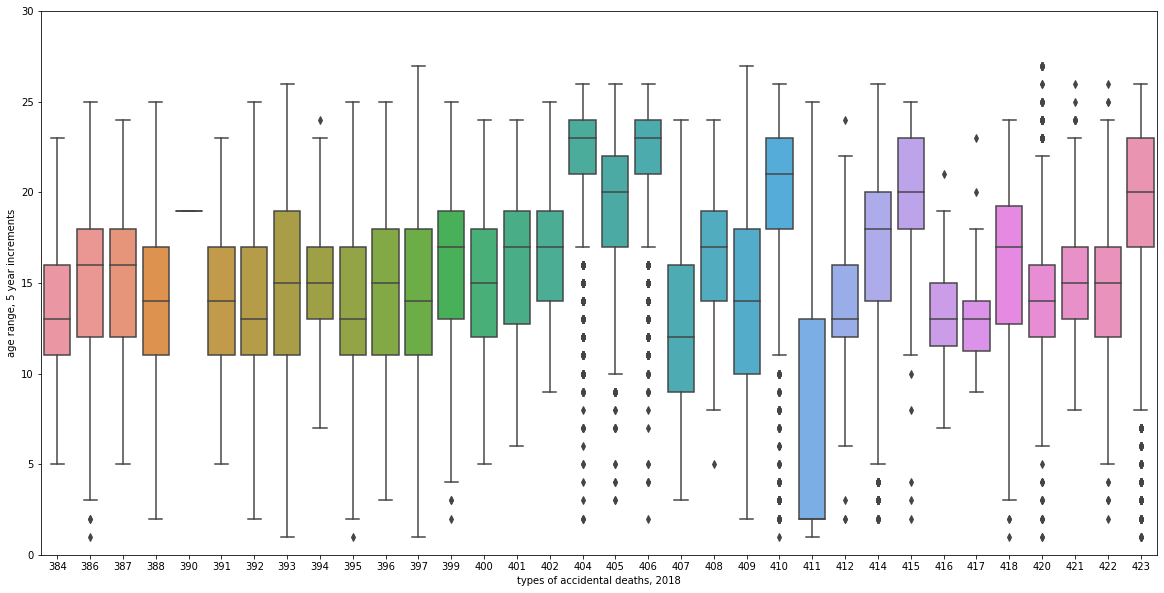

In [323]:
# Relationship btn Age and Accidental Cause of Death 2018
data = pd.concat([acc['age_recode_27'], acc['cause_recode_358']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=acc['cause_recode_358'], y=acc['age_recode_27'], data=data)
fig.axis(ymin=0, ymax=30);
plt.xlabel("types of accidental deaths, 2018")
plt.ylabel("age range, 5 year increments")

Text(0, 0.5, 'age range, 10 year increments')

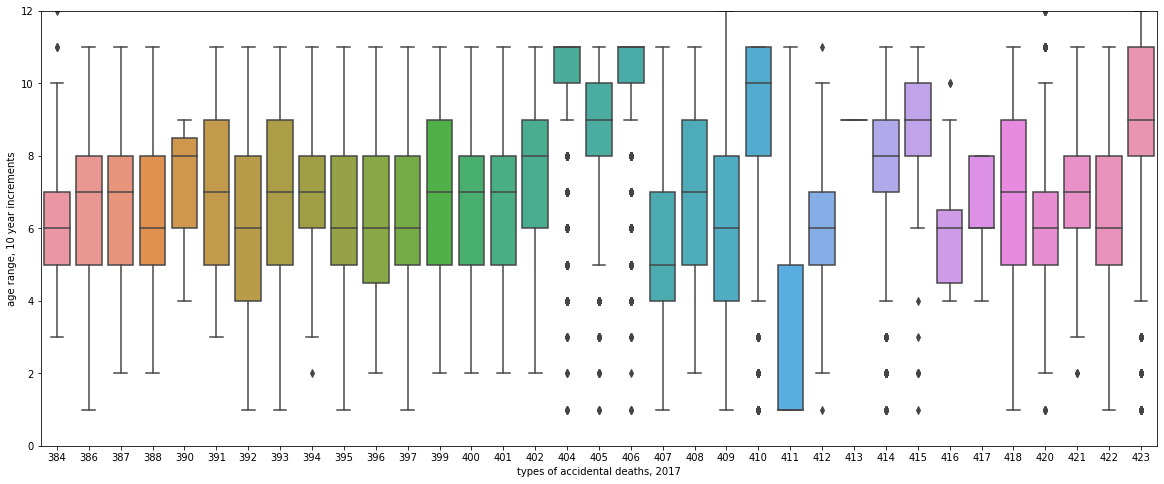

In [312]:
# Relationship btn Age and Accidental Cause of Death 2017
data = pd.concat([acc17['age_recode_12'], acc17['cause_recode_358']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=acc17['cause_recode_358'], y=acc17['age_recode_12'], data=data)
fig.axis(ymin=0, ymax=12);
plt.xlabel("types of accidental deaths, 2017")
plt.ylabel("age range, 10 year increments")

Text(0, 0.5, 'age range, 5 year increments')

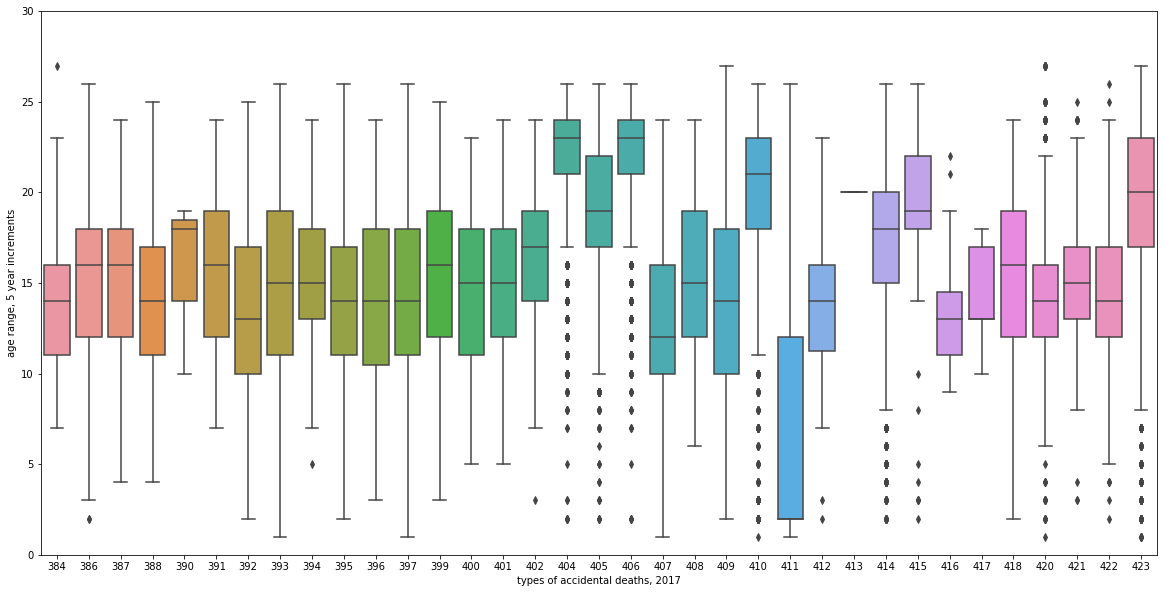

In [313]:
# Relationship btn Age and Accidental Cause of Death 2017
data = pd.concat([acc17['age_recode_27'], acc17['cause_recode_358']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=acc17['cause_recode_358'], y=acc17['age_recode_27'], data=data)
fig.axis(ymin=0, ymax=30);
plt.xlabel("types of accidental deaths, 2017")
plt.ylabel("age range, 5 year increments")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002026FC87F88>,
      dtype=object)

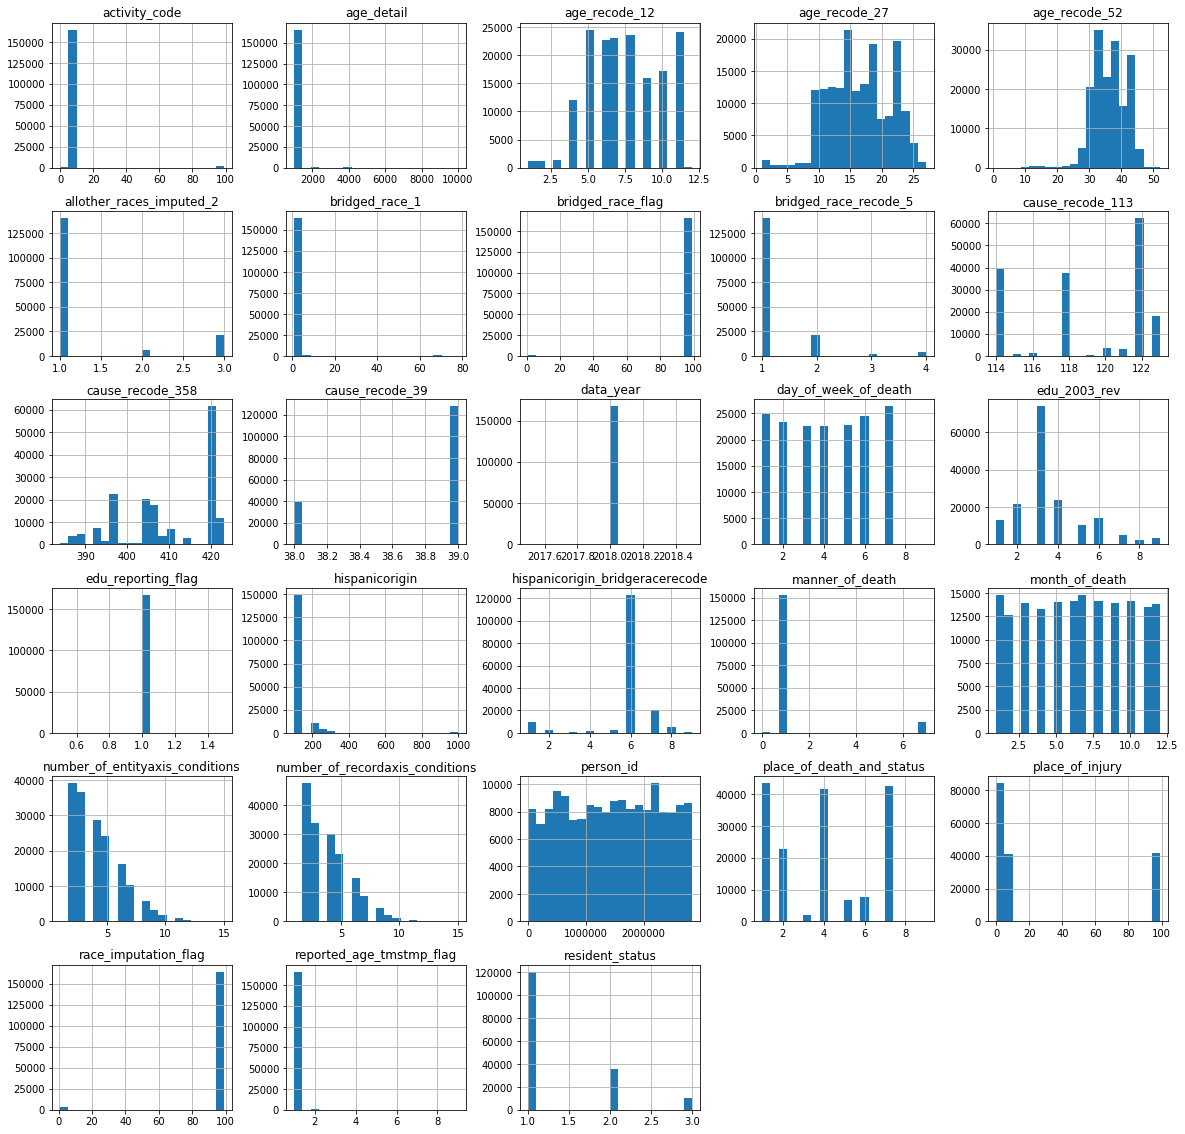

In [324]:
# 2018 Object Histograms
acc.hist(bins=20, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002027A7D7148>,
      dtype=object)

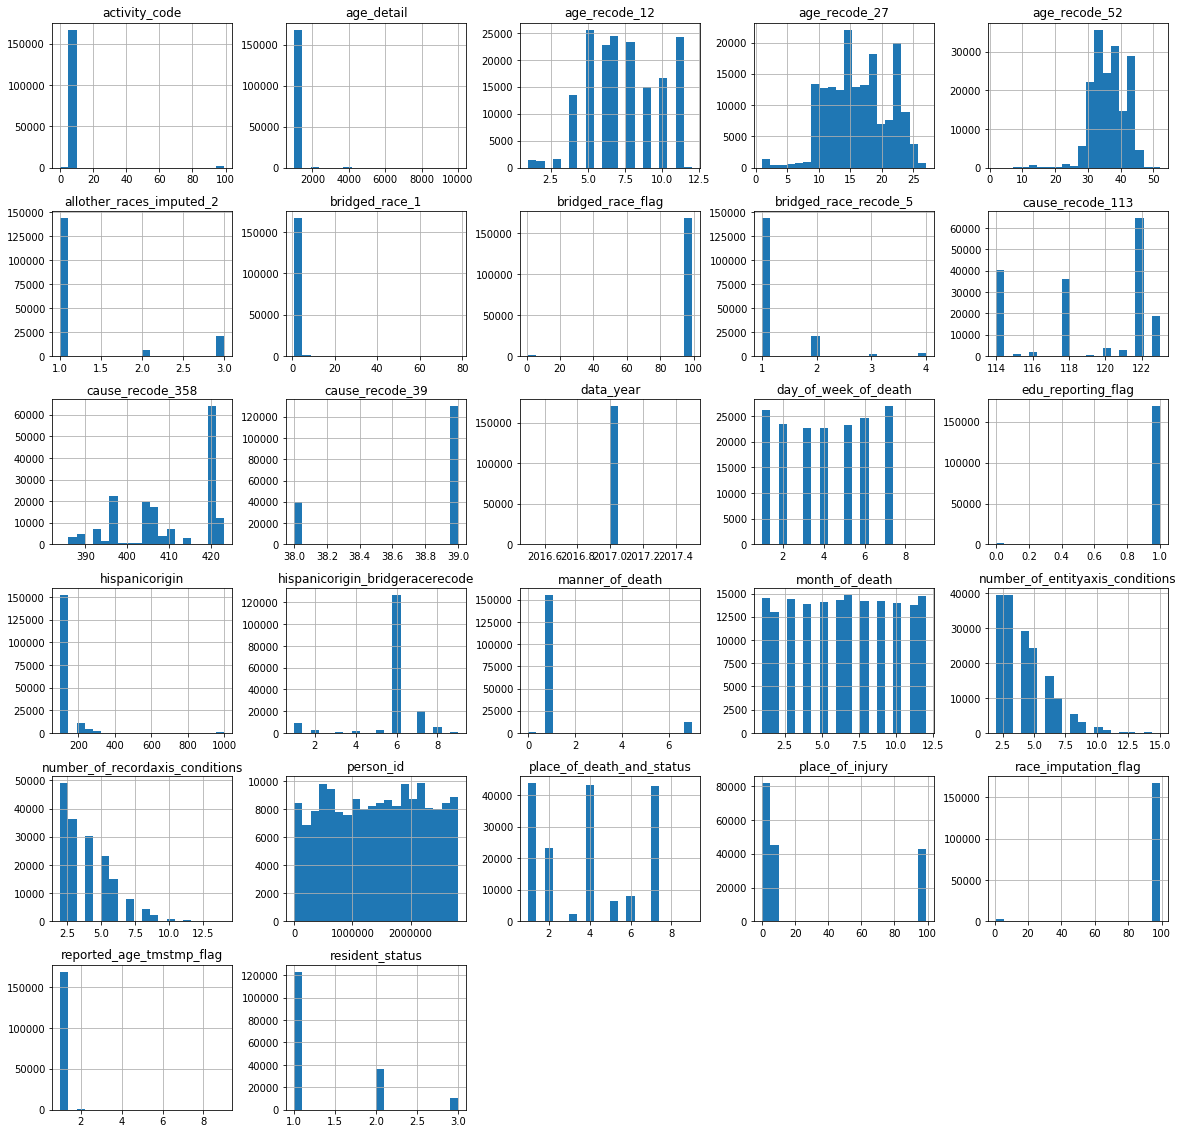

In [314]:
# 2017 Object Histograms
acc17.hist(bins=20, figsize=(20,20))

In [238]:
# numeric features overview
numeric_type = ['int64']
numeric = []
for i in acc.columns:
    if acc[i].dtype in numeric_type:
        numeric.append(i)
    else:
        continue

In [240]:
numeric

['resident_status',
 'edu_2003_rev',
 'edu_reporting_flag',
 'month_of_death',
 'reported_age_tmstmp_flag',
 'age_detail',
 'age_recode_52',
 'age_recode_27',
 'age_recode_12',
 'place_of_death_and_status',
 'day_of_week_of_death',
 'data_year',
 'manner_of_death',
 'cause_recode_358',
 'cause_recode_113',
 'cause_recode_39',
 'number_of_entityaxis_conditions',
 'number_of_recordaxis_conditions',
 'bridged_race_1',
 'allother_races_imputed_2',
 'bridged_race_recode_5',
 'hispanicorigin',
 'hispanicorigin_bridgeracerecode']

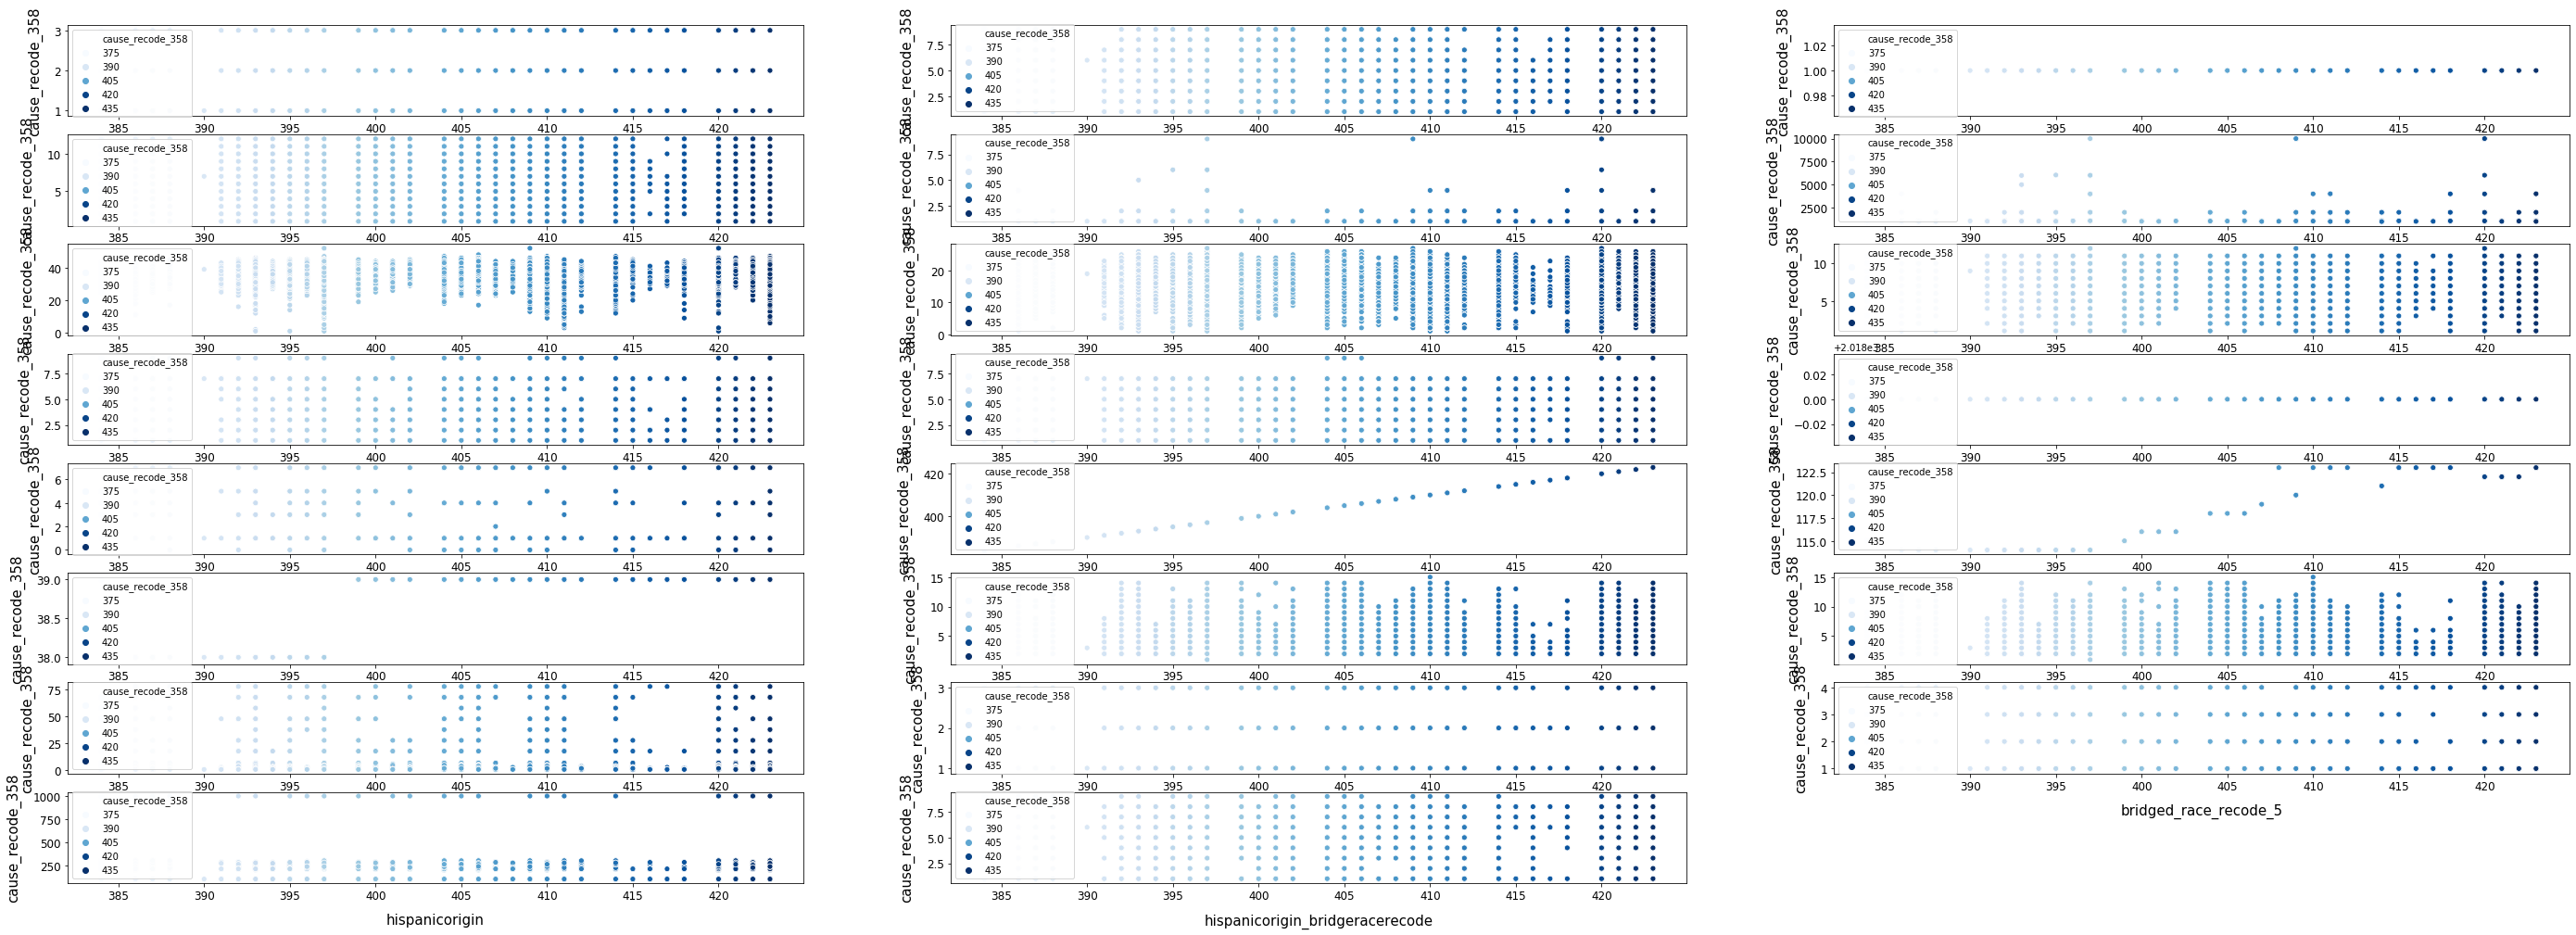

In [319]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20,20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette('husl', 8)
for i, feature in enumerate(list(acc[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x='cause_recode_358', y=feature, hue='cause_recode_358', palette='Blues', data=acc)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('cause_recode_358', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size': 10})

plt.show()

In [288]:
m2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813503 entries, 0 to 2813502
Data columns (total 86 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   person_id                        int32 
 1   year_id                          object
 2   resident_status                  int64 
 3   edu                              object
 4   edu_1989_rev                     object
 5   edu_2003_rev                     object
 6   edu_reporting_flag               int64 
 7   month_of_death                   int64 
 8   sex                              object
 9   reported_age_tmstmp_flag         int64 
 10  reported_age                     object
 11  age_detail                       int64 
 12  age_sub_flag                     object
 13  age_recode_52                    int64 
 14  age_recode_27                    int64 
 15  age_recode_12                    int64 
 16  infant_age_recode_22             object
 17  place_of_death_and_status  

In [317]:
m2011.sample(15)

,person_id,year_id,resident_status,edu,edu_1989_rev,edu_2003_rev,edu_reporting_flag,month_of_death,sex,reported_age_tmstmp_flag,reported_age,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,underlying_cause_of_death,icd_10th_revision,cause_recode_358,cause_recode_113,infant_cause_130,cause_recode_39,multiple_conditions,number_of_entityaxis_conditions,entityaxis_conditions_con,entAx_condition_1st,entAx_condition_2nd,entAx_condition_3rd,entAx_condition_4th,entAx_condition_5th,entAx_condition_6th,entAx_condition_7th,entAx_condition_8th,entAx_condition_9th,entAx_condition_10th,entAx_condition_11th,entAx_condition_12th,entAx_condition_13th,entAx_condition_14th,entAx_condition_15th,entAx_condition_16th,entAx_condition_17th,entAx_condition_18th,entAx_condition_19th,entAx_condition_20th,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th,bridged_race,bridged_race_1,bridged_race_flag,race_imputation_flag,allother_races_imputed_2,bridged_race_recode_5,hispanicorigin,hispanicorigin_bridgeracerecode
183779,183780,1,1,11,,1,1,3,F,1,081 422210,1081,,42,22,10,,1,W,5,2011,U,0,C,N,99,99,I219211 059 21,I219,211,59,,21,0511A419 21N390 31E870 41I219 61F03 ...,5,11A419 21N390 31E870 41I219 61F03 ...,11A419,21N390,31E870,41I219,61F03,,,,,,,,,,,,,,,,5,I219 A419 E870 F03 N390 ...,I219,A419,E870,F03,N390,,,,,,,,,,,,,,,,68 24,68,99,99,2,4,100,8
1357748,1357749,1,1,12 0,12,,0,3,F,1,070 402009,1070,,40,20,9,,1,D,5,2011,U,0,U,N,99,99,K269285 090 29,K269,285,90,,29,0211K269 61J459 ...,2,11K269 61J459 ...,11K269,61J459,,,,,,,,,,,,,,,,,,,2,K269 J459 ...,K269,J459,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
1612362,1612363,1,1,81,,8,1,7,M,1,094 442411,1094,,44,24,11,,4,W,1,2011,U,7,B,U,99,99,I219211 059 21,I219,211,59,,21,0311I469 21I219 31I251 ...,3,11I469 21I219 31I251 ...,11I469,21I219,31I251,,,,,,,,,,,,,,,,,,3,I219 I251 I469 ...,I219,I251,I469,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
2294554,2294555,1,1,16 0,16,,0,5,F,1,074 402009,1074,,40,20,9,,4,M,7,2011,U,0,U,U,99,99,C259088 025 07,C259,88,25,,7,0111C259 ...,1,11C259 ...,11C259,,,,,,,,,,,,,,,,,,,,1,C259 ...,C259,,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
1488828,1488829,1,1,61,,6,1,6,F,1,089 432311,1089,,43,23,11,,4,M,3,2011,U,7,C,N,99,99,C920135 040 14,C920,135,40,,14,0211I469 21C920 ...,2,11I469 21C920 ...,11I469,21C920,,,,,,,,,,,,,,,,,,,2,C920 I469 ...,C920,I469,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
1361382,1361383,1,1,12 0,12,,0,3,M,1,068 391909,1068,,39,19,9,,4,M,7,2011,U,0,U,N,99,99,K703298 094 30,K703,298,94,,30,0711K767 21K746 31F101 61I10 62N189 63D649 64...,7,11K767 21K746 31F101 61I10 62N189 63D649 64I2...,11K767,21K746,31F101,61I10,62N189,63D649,64I251,,,,,,,,,,,,,,6,K703 D649 I10 I251 K767 N189 ...,K703,D649,I10,I251,K767,N189,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
1111005,1111006,1,1,91,,9,1,7,F,1,088 432311,1088,,43,23,11,,4,W,5,2011,U,7,C,N,99,99,F03 175 111 37,F03,175,111,,37,0111F03 ...,1,11F03 ...,11F03,,,,,,,,,,,,,,,,,,,,1,F03 ...,F03,,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
381300,381301,1,1,12 0,12,,0,5,F,1,086 432311,1086,,43,23,11,,7,W,7,2011,U,7,U,N,99,99,C859129 039 13,C859,129,39,,13,0111C859 ...,1,11C859 ...,11C859,,,,,,,,,,,,,,,,,,,,1,C859 ...,C859,,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,281,5
2039132,2039133,1,2,12 0,12,,0,4,F,1,056 371708,1056,,37,17,8,,1,M,6,2011,U,7,U,N,99,99,C349093 027 08,C349,93,27,,8,0211C349 21J189 ...,2,11C349 21J189 ...,11C349,21J189,,,,,,,,,,,

In [316]:
acc.groupby('manner_of_death').size()

manner_of_death
0       876
1    153261
2         4
3       338
4       270
5       250
7     12128
dtype: int64

### Save to csv

In [49]:
%%time
# m2018.to_csv('data/rawdata/mort_2018.csv', index = False, header = True)
# print('m2018 file complete')
# m2017.to_csv('data/rawdata/mort_2017.csv', index = False, header = True)
# print('m2017 file complete')
# m2016.to_csv('data/rawdata/mort_2016.csv', index = False, header = True)
# print('m2016 file complete')
# m2015.to_csv('data/rawdata/mort_2015.csv', index = False, header = True)
# print('m2015 file complete')
# m2014.to_csv('data/rawdata/mort_2014.csv', index = False, header = True)
# print('m2014 file complete')
# m2013.to_csv('data/rawdata/mort_2013.csv', index = False, header = True)
# print('m2013 file complete')
# m2012.to_csv('data/rawdata/mort_2012.csv', index = False, header = True)
# print('m2012 file complete')
# m2011.to_csv('data/rawdata/mort_2011.csv', index = False, header = True)
# print('m2011 file complete')

mAccAll.to_csv('data/mort_accidents_all.csv', index = False, header=True)

Wall time: 11.2 s
